<a href="https://colab.research.google.com/github/LeydiHuallpa/Laboratorio1_Unidad3/blob/master/Laboratorio1-Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio N° 01: Crear un reporte asociado a los datos de negocio

Basado en el conjunto de datos "credit data.csv"

Crear un reporte con la siguiente descripción:

- Periodo de analisis: de 2014 a 2015
- Unidad de Tiempo: Trimestral (y total anual)
- Grupos de analisis: Por ingreso mensual con grupos. 
    * menos de 2.500
    * 2.500 a 5.000
    * 5.000 a 10.000
    * mas de 10.000
- KPIs:
    - Número de Créditos
    - delincuencia promedio (porcentaje de clientes en morosidad de 90dpd)
    - ingreso mensual promedio
- Estructura de tabla:
    * cuartos en columnas
    * Grupos y KPIs en filas.
- Dibuja una gráfica con:
    - Barras apiladas para el número de créditos
    - Líneas para la morosidad media

Adicional, Analisis de Data Exploratorio:

- Crear un par gráfico de parejas para todas las variables
- Crear un gráfico con Ingresos VS Edad en el medio, más distribuciones marginales    

### 1. Import the data

While importing, be sure to take care of:  
    - variable format
    - missing values:
        * missing in MonthlyIncome must be filled with the median
        * missing in NumberOfDependents must be filled with 0
    - dates
    

In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the data
df = pd.read_csv('credit data.csv', sep=';')
df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date
0,1,1,0.766127,45,2,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,17/09/2015
1,2,0,0.957151,40,0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,02/07/2016
2,3,0,0.658180,38,1,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,13/04/2016
3,4,0,0.233810,30,0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,26/08/2016
4,5,0,0.907239,49,1,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,18/11/2015
5,6,0,0.213179,74,0,0.375607,3500.0,3.0,0.0,1.0,0.0,1.0,15/06/2016
6,7,0,0.305682,57,0,5710.000000,NaN,8.0,0.0,3.0,0.0,0.0,12/12/2015
7,8,0,0.754464,39,0,0.209940,3500.0,8.0,0.0,0.0,0.0,0.0,01/04/2016
8,9,0,0.116951,27,0,46.000000,NaN,2.0,0.0,0.0,0.0,NaN,22/06/2014
9,10,0,0.189169,57,0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0,03/07/2014


In [4]:
# check types
df.dtypes

Id                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                      float64
cohort_date                              object
dtype: object

In [5]:
# check the dates are well loaded
df.count()

Id                                      68764
SeriousDlqin2yrs                        68764
RevolvingUtilizationOfUnsecuredLines    68764
age                                     68764
NumberOfTime30-59DaysPastDueNotWorse    68764
DebtRatio                               68764
MonthlyIncome                           55128
NumberOfOpenCreditLinesAndLoans         68763
NumberOfTimes90DaysLate                 68763
NumberRealEstateLoansOrLines            68763
NumberOfTime60-89DaysPastDueNotWorse    68763
NumberOfDependents                      66956
cohort_date                             68763
dtype: int64

### 2. Missing values inputation

In [6]:
# check missings

df.isnull().sum().sum()

15449

In [7]:
# missing imputation
df['MonthlyIncome'].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6         True
7        False
8         True
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16        True
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
68734    False
68735    False
68736    False
68737    False
68738     True
68739     True
68740    False
68741    False
68742    False
68743     True
68744     True
68745     True
68746    False
68747    False
68748    False
68749    False
68750     True
68751    False
68752    False
68753    False
68754    False
68755    False
68756    False
68757    False
68758    False
68759    False
68760    False
68761    False
68762    False
68763    False
Name: MonthlyIncome, Length: 68764, dtype: bool

In [8]:
# check missings
df['MonthlyIncome'].isnull().sum()

13636

### 3. Select the data sample for the report

In [9]:
# filter by date

df['cohort_date'] = pd.to_datetime(df['cohort_date'])
filtro_date = '17-09-2016'
mask = (df['cohort_date'] > filtro_date)
df = df.loc[mask]
df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date
17,18,0,0.166284,53,0,0.188274,8800.0,7.0,0.0,0.0,0.0,0.0,2016-12-06
38,39,0,0.363636,26,0,0.009990,1000.0,1.0,0.0,0.0,0.0,0.0,2016-10-06
41,42,0,0.072898,81,0,75.000000,NaN,7.0,0.0,0.0,0.0,0.0,2016-10-01
78,79,0,0.335559,69,0,0.270449,15000.0,14.0,0.0,2.0,0.0,1.0,2016-11-01
97,98,0,0.010531,57,0,0.280665,5714.0,6.0,0.0,1.0,0.0,0.0,2016-11-04
224,225,0,0.455951,63,1,0.701766,6001.0,19.0,0.0,2.0,0.0,0.0,2016-12-05
241,242,0,0.002857,73,0,0.000286,10500.0,10.0,0.0,0.0,0.0,0.0,2016-10-01
248,249,0,0.012151,78,0,0.008887,4500.0,12.0,0.0,0.0,0.0,0.0,2016-12-01
285,286,0,0.048244,62,0,0.262879,16615.0,11.0,0.0,1.0,0.0,1.0,2016-12-02
361,362,0,0.186683,30,0,0.698121,2500.0,7.0,0.0,2.0,0.0,2.0,2016-11-05


In [10]:
# checking
df['cohort_date'].count()

1610

### 4. Create intermediate variables

Hints: 
- use *.dt.year and *.dt.quarter for date columns and astype() to convert columns
- use pd.cut() method for binning a variable

In [11]:
# create quarter variable
df['year'] = pd.DatetimeIndex(df['cohort_date']).year
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date,year
17,18,0,0.166284,53,0,0.188274,8800.0,7.0,0.0,0.0,0.0,0.0,2016-12-06,2016
38,39,0,0.363636,26,0,0.009990,1000.0,1.0,0.0,0.0,0.0,0.0,2016-10-06,2016
41,42,0,0.072898,81,0,75.000000,NaN,7.0,0.0,0.0,0.0,0.0,2016-10-01,2016
78,79,0,0.335559,69,0,0.270449,15000.0,14.0,0.0,2.0,0.0,1.0,2016-11-01,2016
97,98,0,0.010531,57,0,0.280665,5714.0,6.0,0.0,1.0,0.0,0.0,2016-11-04,2016


In [0]:
# create income_groups variable


In [0]:
# check




### 5. Crear Reportes

In [0]:
# make dataframe groupby object





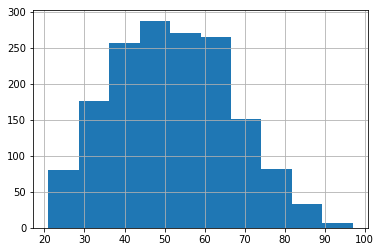

In [12]:
# report for age

df['age'].hist()

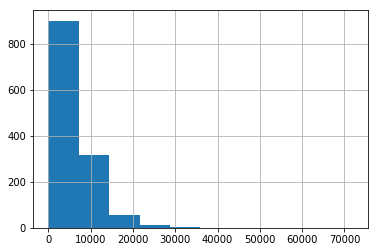

In [13]:
# report for MonthlyIncome

df['MonthlyIncome'].hist()

In [0]:
# merge both reports





In [0]:
# pivot table



# arrange for final report



# export to csv




### 6. Graficos

In [0]:
# bar plot



# line plot




### 7. Exploratory Data Analysis

In [0]:
# Correlation plot




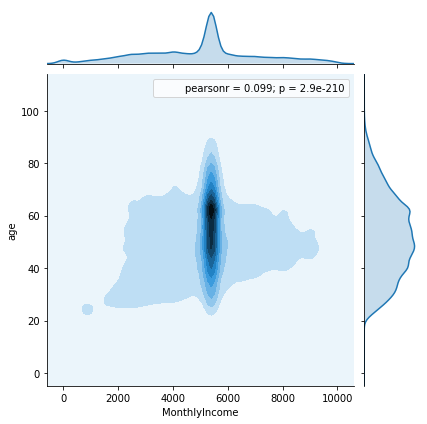

In [0]:
# Scatter plot with margins


